In [1]:
### IMPORT LIBRARIES ###

# IMPORT SCIENTIFIC LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib widget
%matplotlib inline
import pandas as pd
import seaborn as sns
from scipy.optimize import curve_fit

# IMPORT CUSTOM LIBRARIES
from IN8_read_data import read_IN8scan, read_IN8scan_specJun24, gen_data_df_specJun24
from functions import *

from alias import *

In [2]:
### IMPORT OF MEASUREMENTS DATA ###
data = gen_data_df_specJun24('./data/scan_database.tsv', './data/rawdata/')
sumup_col = ['name', 'notes', 'date', 'time', 'QM', 'E', 'steps']
display(data[sumup_col])

Scan 50359 not found
Scan 50360 not found


,name,notes,date,time,QM,E,steps
Nscan,,,,,,,
50304,sc a5,STOP,03-Jun-24,15:08:38,4.904906,-0.0134,A5= 0.1000
50305,sc a5,Scan a 2theta fisso per allineare l'analizzato...,03-Jun-24,15:08:49,4.904906,-0.0134,A5= 0.2000
50306,sc a3,Allineamento slit nel pentolone a3 => 10,03-Jun-24,15:19:27,4.904922,-0.0134,A3= 2.0000
50307,sc ei 69.68 dei 0.5 np 15 mn 2000,vediamo lo scan in energia,03-Jun-24,15:32:02,4.843829,-3.5464,EI= 0.5000
50308,sc ei 69.68 dei 0.5 np 15 mn 2000,rivediamo lo scan in ei,03-Jun-24,15:41:02,4.842048,-3.5464,EI= 0.5000
...,...,...,...,...,...,...,...
050312+050316,NaN,NaN,NaN,NaN,0.700555,NaN,EN= 0.5000
050313+050317,NaN,NaN,NaN,NaN,0.900861,NaN,EN= 0.5000
050314+050318,NaN,NaN,NaN,NaN,1.100679,NaN,EN= 0.5000


# Tempi

| Monitor | Q | tempo [ore-minuti] | tempo [ore] | flusso a M1 
|---------|---|--------------------|--------------|------------
| 5000    | .5| 1:01               | 1.00         | tempo calcolato con 65
| 5000    | .7| 1:33               | 1.55         | 65
| 5000    | .9| 2:00               | 2.00         | 64
| 5000    |1.1| 2:33               | 2.55         | 63
| 5000    |1.5| 3:00               | 3.00         | 63

# Risoluzione con Vanadio

Gaussian fit results:
x0 = 0.02 +/- 0.02 meV
FWHM = 2.08 +/- 0.03 meV


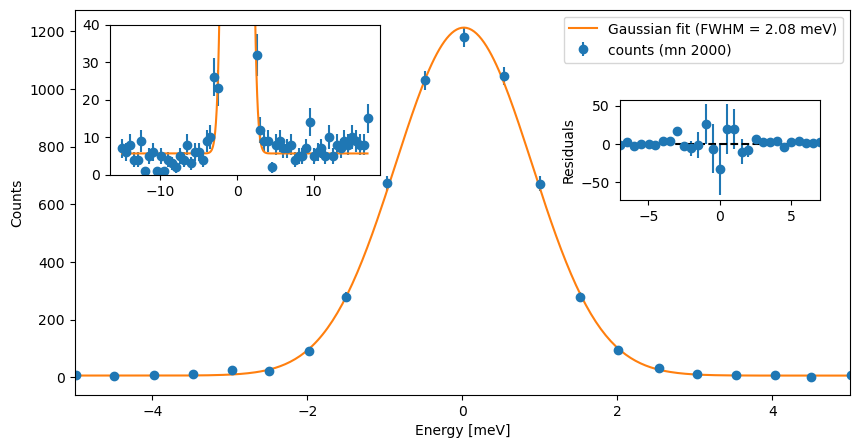

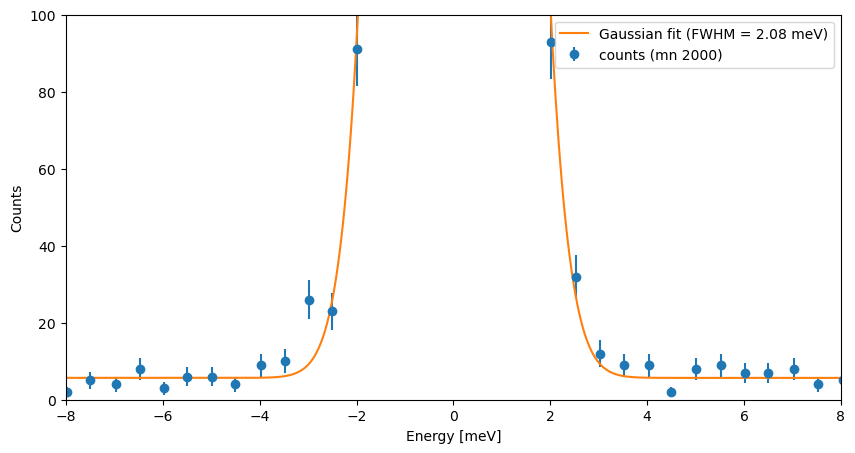

In [3]:
plt.figure(figsize=(10,5))
S = data.loc[Nvana[.7]].data
plt.errorbar(S.EN, S.CNTS, yerr=S.dCNTS, fmt='o', label='counts (mn 2000)')

gauss = lambda x, A, x0, FWHM, c: A*np.exp(-(x-x0)**2/(2*(FWHM/2.355)**2)) + c

popt, pcov = curve_fit(gauss, S.EN[(S.EN>-5) & (S.EN<5)], S.CNTS[(S.EN>-5) & (S.EN<5)], sigma=S.dCNTS[(S.EN>-5) & (S.EN<5)])
X = np.linspace(S.EN.min(), S.EN.max(), 1000)
plt.plot(X, gauss(X, *popt), label='Gaussian fit (FWHM = {:.2f} meV)'.format(popt[2]))

plt.legend()
plt.xlabel('Energy [meV]')
plt.ylabel('Counts')
plt.xlim(-5,5)

# add above as an inset figure
plt.axes([0.16, 0.55, 0.27, 0.3])
plt.errorbar(S.EN, S.CNTS, yerr=S.dCNTS, fmt='o')
plt.plot(X, gauss(X, *popt))
plt.ylim(0,40)

# and add residuals
plt.axes([0.67, 0.5, 0.2, 0.2])
plt.errorbar(S.EN, S.CNTS - gauss(S.EN, *popt), yerr=S.dCNTS, fmt='o')
plt.axhline(0, color='k', ls='--')
plt.ylabel('Residuals')
plt.xlim(-7,7)


# ZOOM
plt.figure(figsize=(10,5))
S = data.loc[Nvana[.7]].data
plt.errorbar(S.EN, S.CNTS, yerr=S.dCNTS, fmt='o', label='counts (mn 2000)')
plt.plot(X, gauss(X, *popt), label='Gaussian fit (FWHM = {:.2f} meV)'.format(popt[2]))

plt.legend()
plt.xlabel('Energy [meV]')
plt.ylabel('Counts')
plt.xlim(-8,8)
plt.ylim(0,100)

# print of the fit results
print('Gaussian fit results:')
print('x0 = {:.2f} +/- {:.2f} meV'.format(popt[1], np.sqrt(pcov[1,1])))
print('FWHM = {:.2f} +/- {:.2f} meV'.format(popt[2], np.sqrt(pcov[2,2])))


### Primo test
Guardo come è invece la risoluzione del primo test che avevamo fatto. Risulta identica!

Gaussian fit results:
x0 = 69.67 +/- 0.02 meV (working at Ef = 69.7 meV)
FWHM = 2.07 +/- 0.03 meV


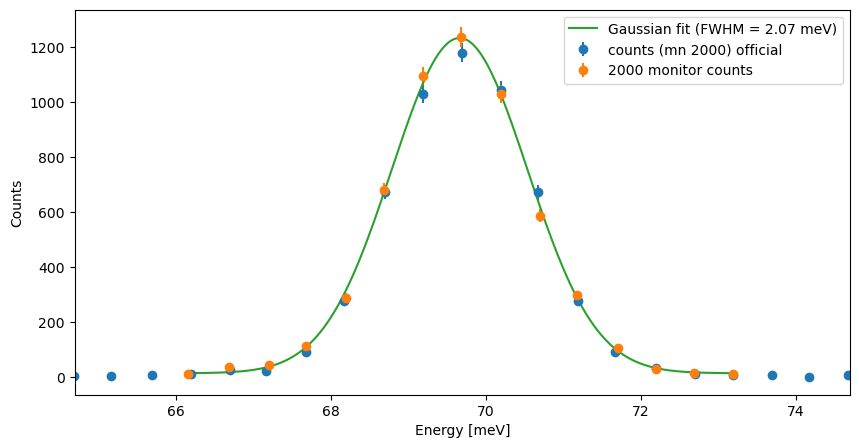

In [30]:
plt.figure(figsize=(10,5))

S = data.loc[Nvana[.7]].data
plt.errorbar(S.EN+69.67, S.CNTS, yerr=S.dCNTS, fmt='o', label='counts (mn 2000) official')

S = data.loc[Nvana['.7_test']].data
plt.errorbar(S.EI, S.CNTS, yerr=S.dCNTS, fmt='o', label='2000 monitor counts')

gauss = lambda x, A, x0, FWHM, c: A*np.exp(-(x-x0)**2/(2*(FWHM/2.355)**2)) + c

popt, pcov = curve_fit(gauss, S.EI, S.CNTS, sigma=S.dCNTS, p0=[1000, 70, 1, 0])
X = np.linspace(S.EI.min(), S.EI.max(), 1000)
plt.plot(X, gauss(X, *popt), label='Gaussian fit (FWHM = {:.2f} meV)'.format(popt[2]))

plt.legend()
plt.xlabel('Energy [meV]')
plt.ylabel('Counts')
plt.xlim(69.7-5,69.7+5)

# print of the fit results
print('Gaussian fit results:')
print('x0 = {:.2f} +/- {:.2f} meV (working at Ef = 69.7 meV)'.format(popt[1], np.sqrt(pcov[1,1])))
print('FWHM = {:.2f} +/- {:.2f} meV'.format(popt[2], np.sqrt(pcov[2,2])))

## Comparison of resolutions: correct vs wrong conf

Gaussian fit results:
x0 = 0.12 +/- 0.01 meV (working at Ef = 69.7 meV)
FWHM = 2.00 +/- 0.03 meV


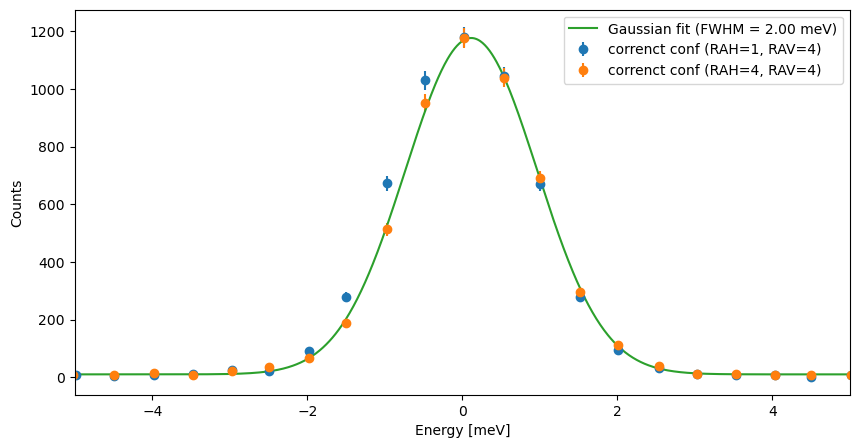

In [38]:
plt.figure(figsize=(10,5))

S = data.loc[Nvana[.7]].data
plt.errorbar(S.EN, S.CNTS, yerr=S.dCNTS, fmt='o', label='correnct conf (RAH=1, RAV=4)')

S = data.loc[Nvana['.7 wrong curvature']].data
plt.errorbar(S.EN, S.CNTS, yerr=S.dCNTS, fmt='o', label='correnct conf (RAH=4, RAV=4)')

gauss = lambda x, A, x0, FWHM, c: A*np.exp(-(x-x0)**2/(2*(FWHM/2.355)**2)) + c

popt, pcov = curve_fit(gauss, S.EN, S.CNTS, sigma=S.dCNTS, p0=[1000,0, 1, 0])
X = np.linspace(S.EN.min(), S.EN.max(), 1000)
plt.plot(X, gauss(X, *popt), label='Gaussian fit (FWHM = {:.2f} meV)'.format(popt[2]))

plt.legend()
plt.xlabel('Energy [meV]')
plt.ylabel('Counts')
plt.xlim(-5,+5)

# print of the fit results
print('Gaussian fit results:')
print('x0 = {:.2f} +/- {:.2f} meV (working at Ef = 69.7 meV)'.format(popt[1], np.sqrt(pcov[1,1])))
print('FWHM = {:.2f} +/- {:.2f} meV'.format(popt[2], np.sqrt(pcov[2,2])))

In [5]:
resf = lambda x: np.exp(-(x)**2/(2*(2.07/2.355)**2))

# Empty cells

(-7.0, 7.0)

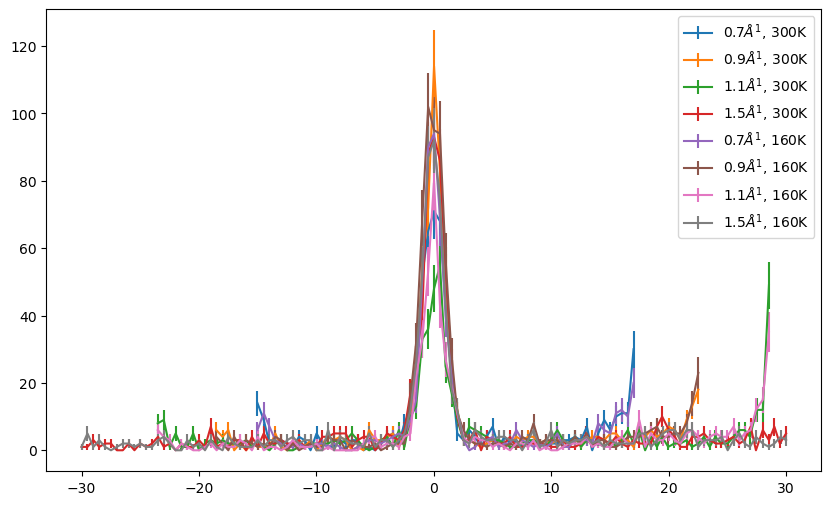

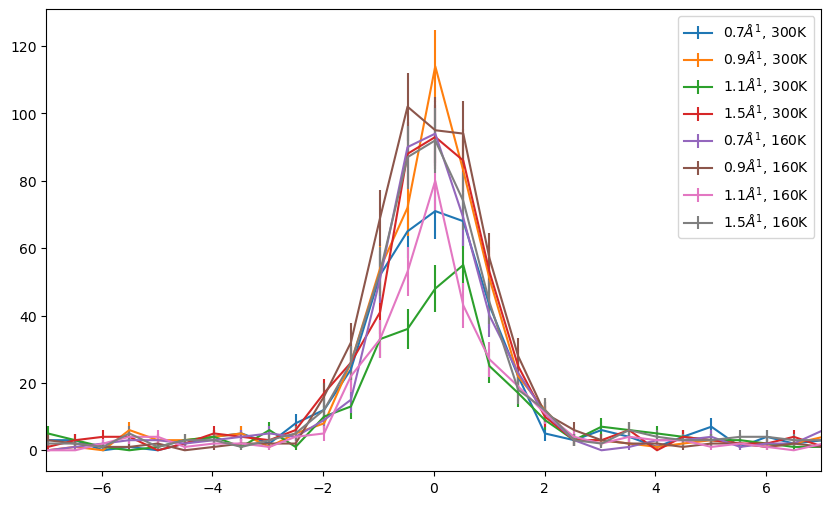

In [6]:
plt.figure(figsize=(10,6))
for T in [300, 160]:
    for q in [.7, .9, 1.1, 1.5]:
        S = data.loc[Nempty[T,q]].data
        plt.errorbar(S.EN, S.CNTS, yerr=S.dCNTS, label='{:.1f}$\AA^1$, {:.0f}K'.format(q, T))
plt.legend()

plt.figure(figsize=(10,6))
for T in [300, 160]:
    for q in [.7, .9, 1.1, 1.5]:
        S = data.loc[Nempty[T,q]].data
        plt.errorbar(S.EN, S.CNTS, yerr=S.dCNTS, label='{:.1f}$\AA^1$, {:.0f}K'.format(q, T))
plt.legend()
plt.xlim(-7,7)

## Comparison of same Q at different Temperatures
As a result, we can work with a single empty cell, summing the two at different T for encrising the statistics.

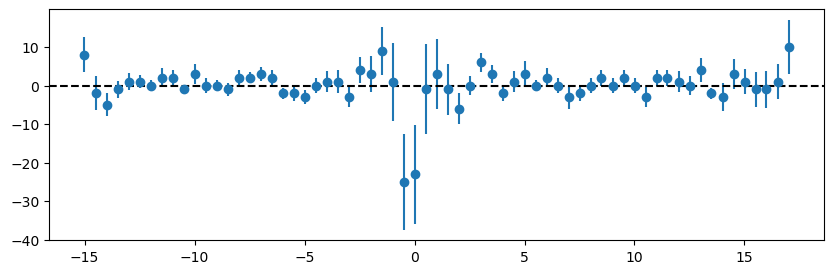

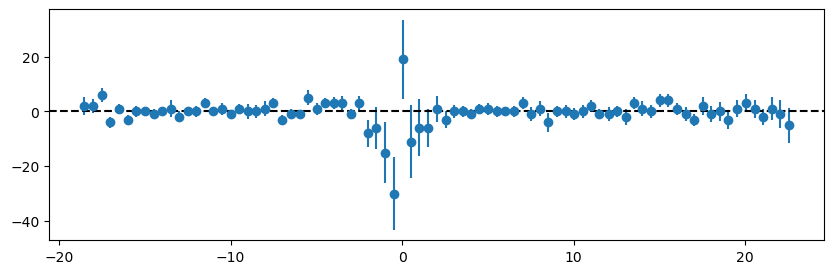

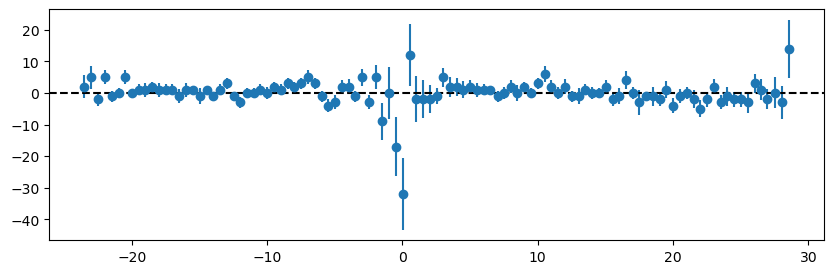

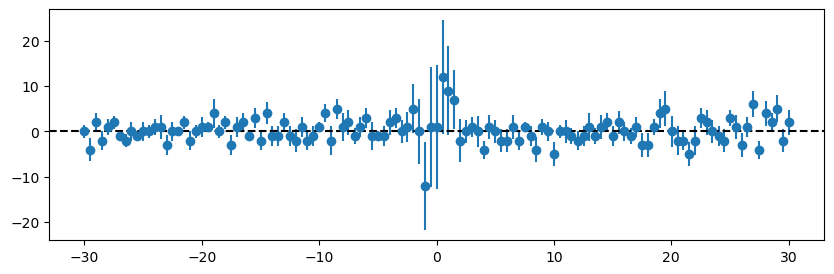

In [7]:
for q in [.7, .9, 1.1, 1.5]:
    plt.figure(figsize=(10,3))
    S1 = data.loc[Nempty[300,q]].data
    S2 = data.loc[Nempty[160,q]].data
    plt.errorbar(S1.EN, S1.CNTS-S2.CNTS, yerr=np.sqrt(S1.dCNTS**2 + S2.dCNTS**2), label='{:.1f}$\AA^1$'.format(q), fmt = 'o')
    plt.axhline(0, color='k', ls='--')

## Averaged empty cells

Text(0, 0.5, 'Counts')

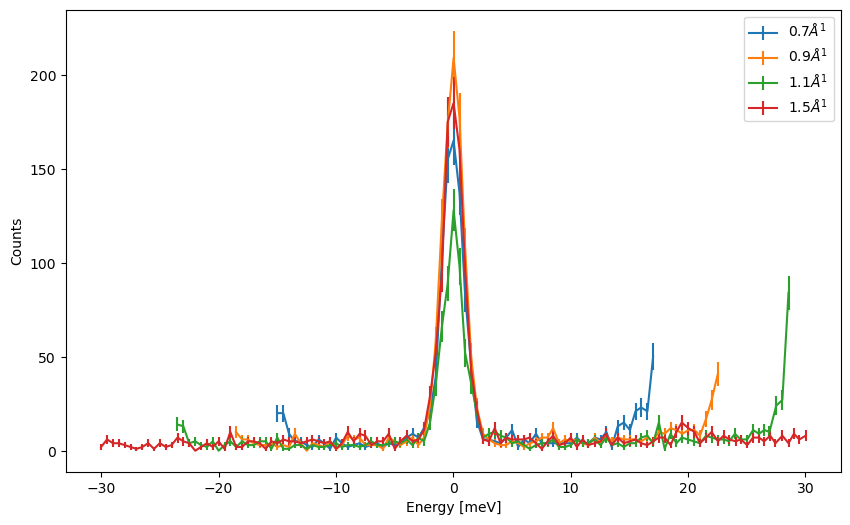

In [8]:
plt.figure(figsize=(10,6))
for q in [.7, .9, 1.1, 1.5]:
    S = data.loc[Nempty[q]].data
    plt.errorbar(S.EN, S.CNTS, yerr=S.dCNTS, label=r'{:.1f}$\AA^1$'.format(q))
plt.legend()
plt.xlabel('Energy [meV]')
plt.ylabel('Counts')

# S(Q) of empty cell


| Alluminium reflection | Q[$\AA^{-1}$]
|-----------------------|--------------
| (111)                 | 2.6877
| (002)                 | 3.1035

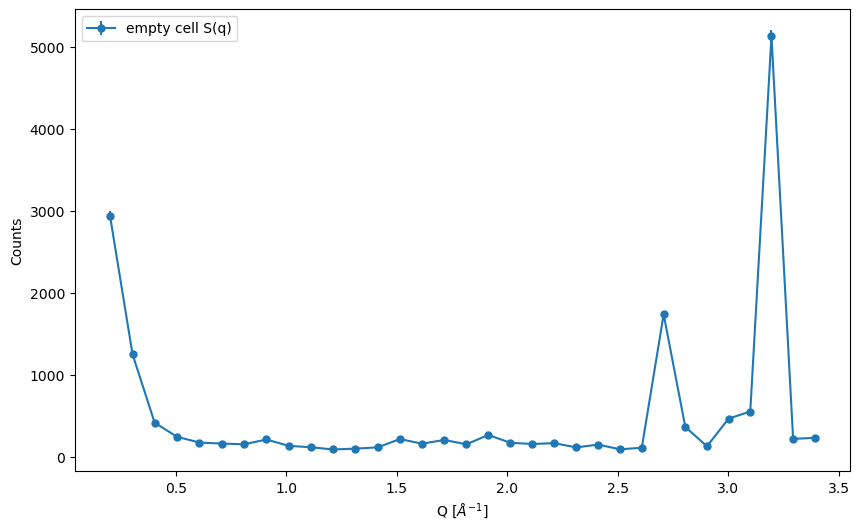

In [9]:
Sq_al = data.loc[NSq_al].data

plt.figure(figsize=(10,6))
plt.errorbar(Sq_al.QM, Sq_al.CNTS, yerr=Sq_al.dCNTS, label='empty cell S(q)', ms = 5, fmt='o-')
plt.xlabel('Q [$\AA^{-1}$]')
plt.ylabel('Counts')
plt.legend()

# S(Q) of glycerol

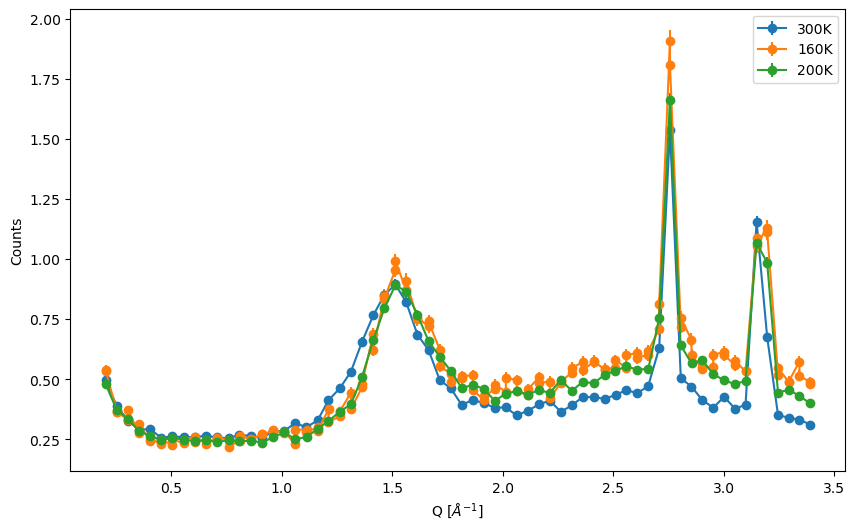

In [19]:
plt.figure(figsize=(10,6))

for T in [300, 160, 200]:
    S = data.loc[NSq_gly[T]].data
    plt.errorbar(S.QM, S.CNTS/S.M1, yerr=S.dCNTS/S.M1, label='{:.0f}K'.format(T), fmt='o-')

plt.xlabel('Q [$\AA^{-1}$]')
plt.ylabel('Counts')
plt.legend()

# First view of glycerol

## 300K

(-10.0, 10.0)

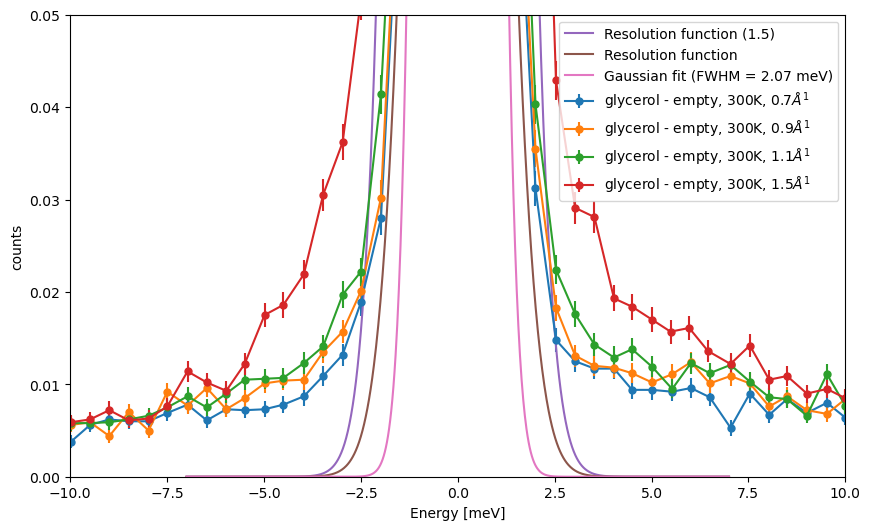

In [11]:
plt.figure(figsize=(10,6))

for q in [.7, .9, 1.1, 1.5]:
    S_gly = data.loc[Ngly[300,q]].data
    S_empty = data.loc[Nempty[q]].data
    CNTS = (S_gly.CNTS/S_gly.M1 - S_empty.CNTS/S_empty.M1)
    dCNTS = np.sqrt((S_gly.dCNTS/S_gly.M1)**2 + (S_empty.dCNTS/S_empty.M1)**2) 
    EN = S_gly.EN
    plt.errorbar(EN, CNTS, yerr=dCNTS, label='glycerol - empty, 300K, {:.1f}$\AA^1$'.format(q), ms = 5, fmt='o-')

X = np.linspace(-7,7,1000)
plt.plot(X, resf(X)*.9, label='Resolution function (1.5)')
plt.plot(X, resf(X)*.25, label='Resolution function')
plt.plot(X, gauss(X, .9, 0, 1.3, 0), label='Gaussian fit (FWHM = 2.07 meV)')

plt.xlabel('Energy [meV]')
plt.ylabel('counts')
plt.legend()
plt.ylim(0, .05)
plt.xlim(-10,10)

## 160K

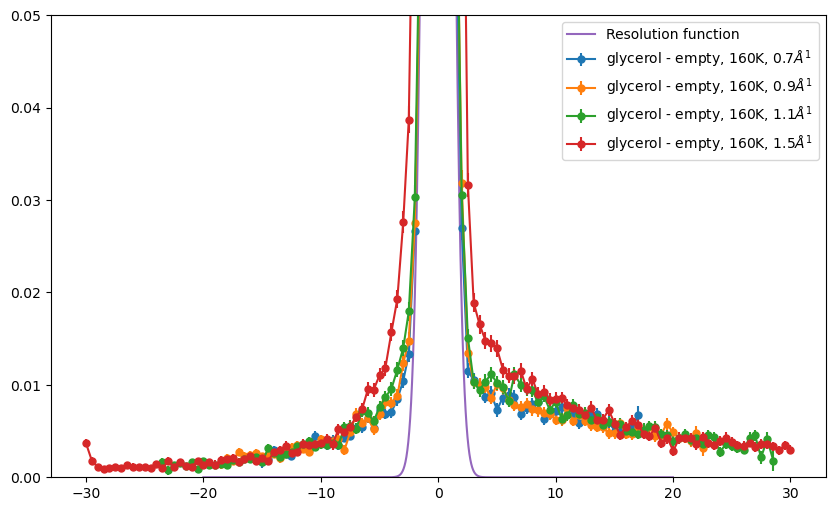

In [12]:
plt.figure(figsize=(10,6))

for q in [.7, .9, 1.1, 1.5]:
    S_gly = data.loc[Ngly[160,q]].data
    S_empty = data.loc[Nempty[q]].data
    CNTS = (S_gly.CNTS/S_gly.M1 - S_empty.CNTS/S_empty.M1)
    dCNTS = np.sqrt((S_gly.dCNTS/S_gly.M1)**2 + (S_empty.dCNTS/S_empty.M1)**2) 
    EN = S_gly.EN
    plt.errorbar(EN, CNTS, yerr=dCNTS, label='glycerol - empty, 160K, {:.1f}$\AA^1$'.format(q), ms = 5, fmt='o-')

X = np.linspace(-20,20,1000)
plt.plot(X, resf(X)*.25, label='Resolution function')
plt.ylim(0, 0.05)
plt.legend()

## 200K

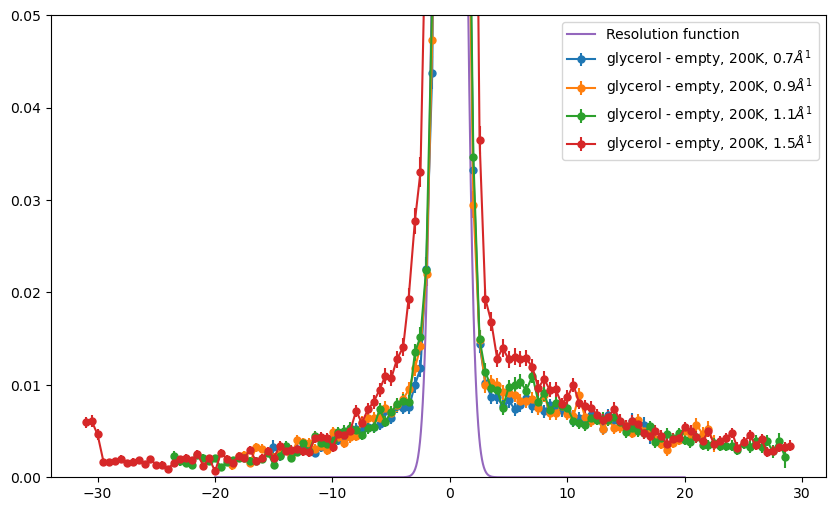

In [13]:
plt.figure(figsize=(10,6))

for q in [.7, .9, 1.1, 1.5]:
    S_gly = data.loc[Ngly[200,q]].data
    S_empty = data.loc[Nempty[q]].data
    CNTS = (S_gly.CNTS/S_gly.M1 - S_empty.CNTS/S_empty.M1)
    dCNTS = np.sqrt((S_gly.dCNTS/S_gly.M1)**2 + (S_empty.dCNTS/S_empty.M1)**2) 
    EN = S_gly.EN
    plt.errorbar(EN, CNTS, yerr=dCNTS, label='glycerol - empty, 200K, {:.1f}$\AA^1$'.format(q), ms = 5, fmt='o-')

X = np.linspace(-20,20,1000)
plt.plot(X, resf(X)*.25, label='Resolution function')
plt.ylim(0, 0.05)
plt.legend()

## T comparison

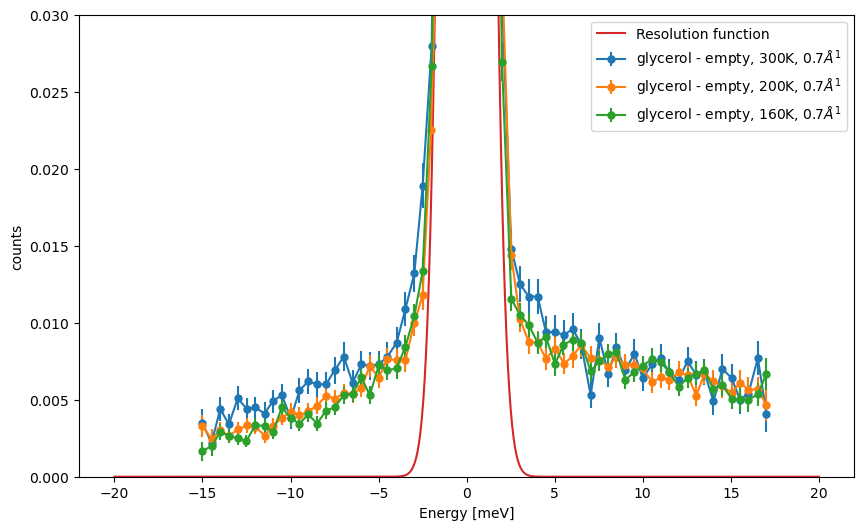

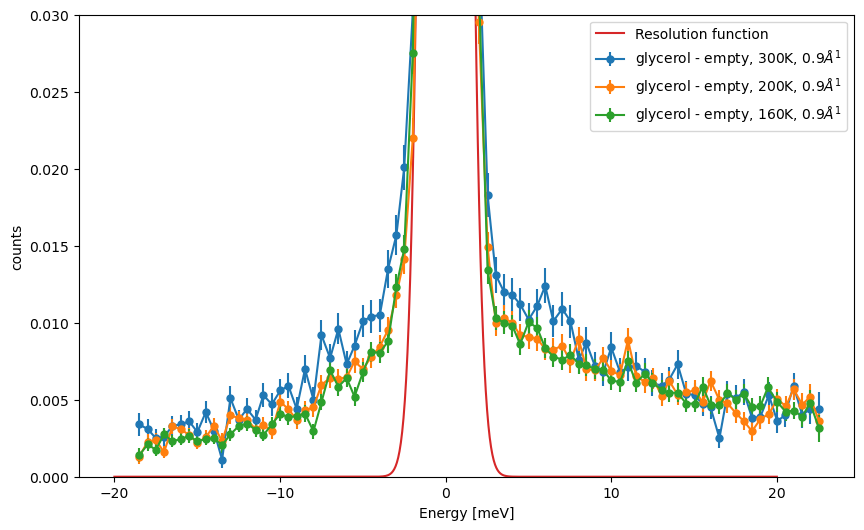

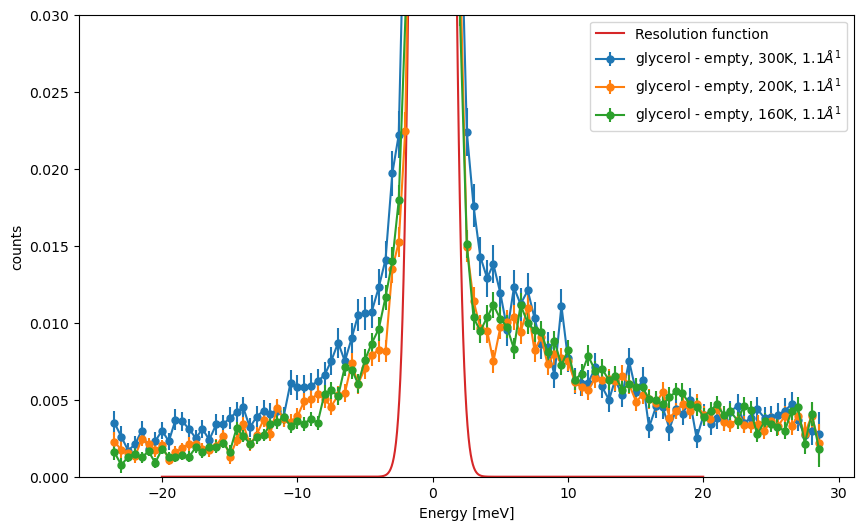

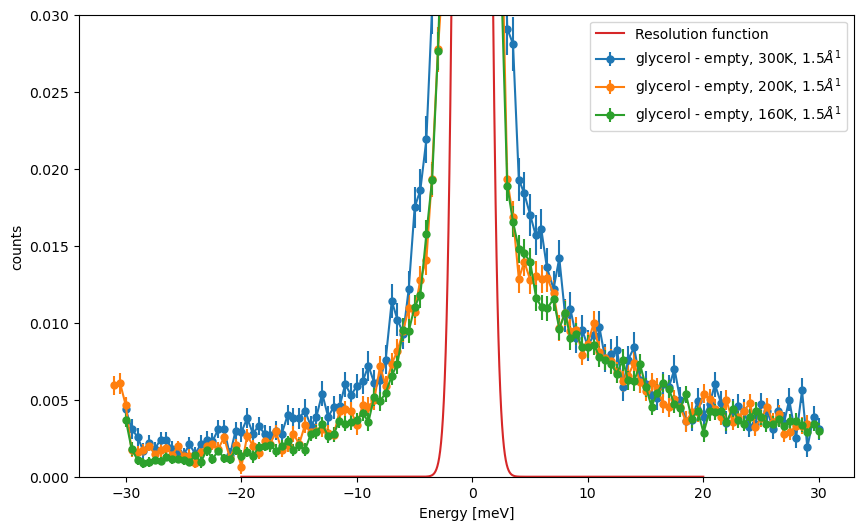

In [14]:
for q in [.7, .9, 1.1, 1.5]:
    plt.figure(figsize=(10,6))
    plt.xlabel('Energy [meV]')
    plt.ylabel('counts')
    for T in [300, 200, 160]:
        try:
                S_gly = data.loc[Ngly[T,q]].data
                S_empty = data.loc[Nempty[q]].data
                CNTS = (S_gly.CNTS/S_gly.M1 - S_empty.CNTS/S_empty.M1)
                dCNTS = np.sqrt((S_gly.dCNTS/S_gly.M1)**2 + (S_empty.dCNTS/S_empty.M1)**2) 
                EN = S_gly.EN
                plt.errorbar(EN, CNTS, yerr=dCNTS, label='glycerol - empty, {:}K, {:.1f}$\AA^1$'.format(T,q), ms = 5, fmt='o-')
        except:pass
    plt.plot(X, resf(X)*.25, label='Resolution function')
    plt.ylim(0, .03)
    plt.legend()

## Detailed Balance

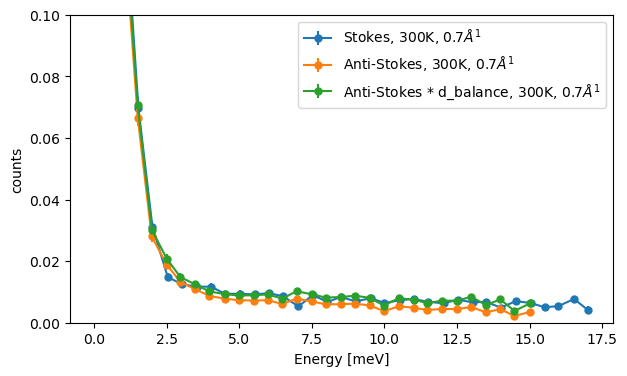

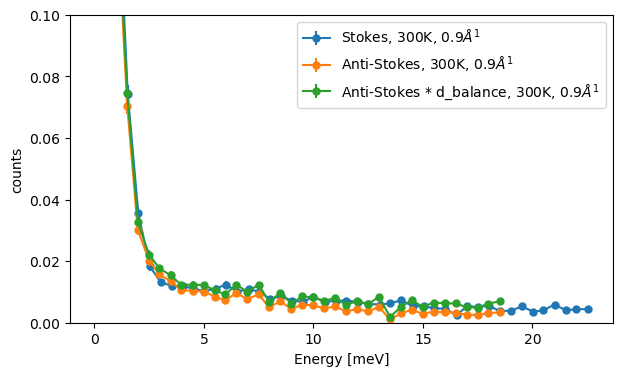

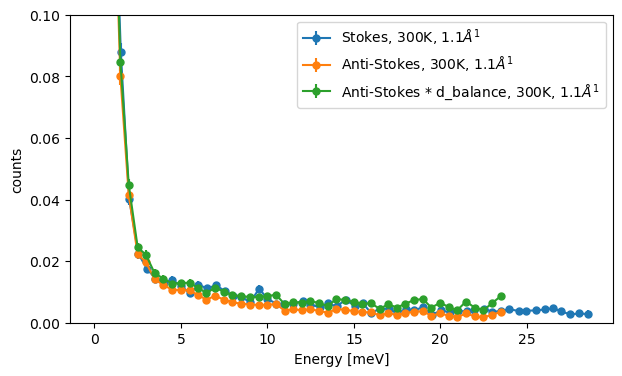

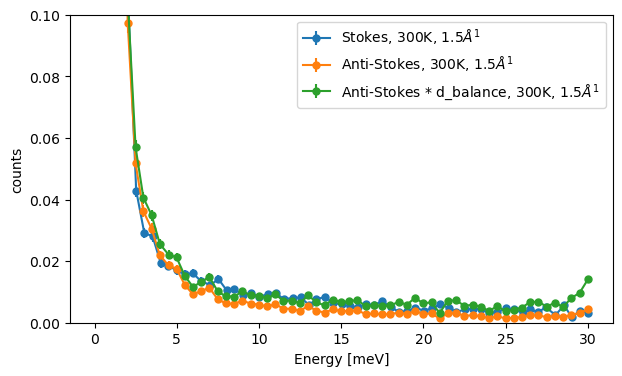

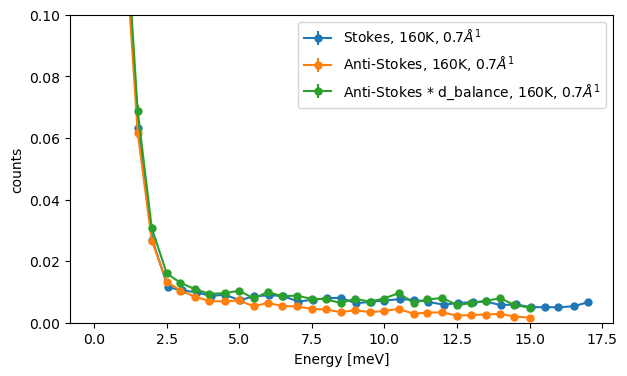

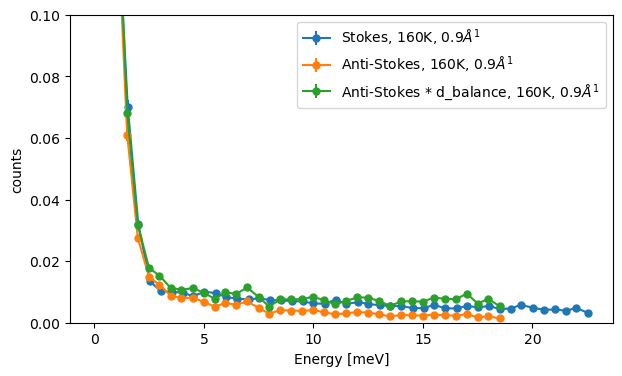

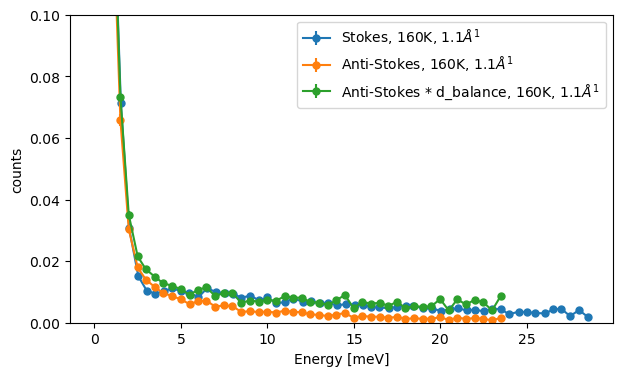

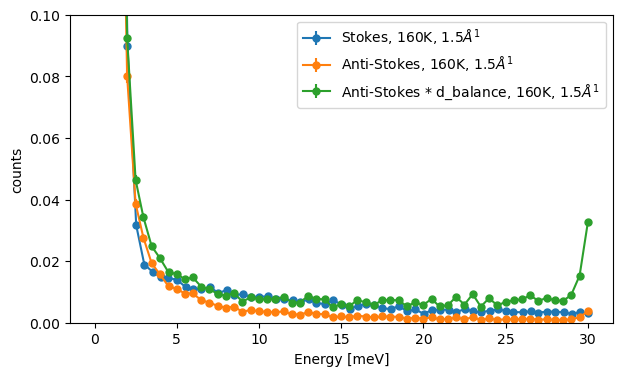

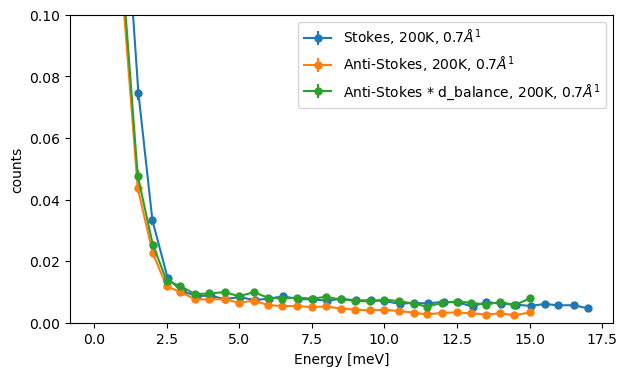

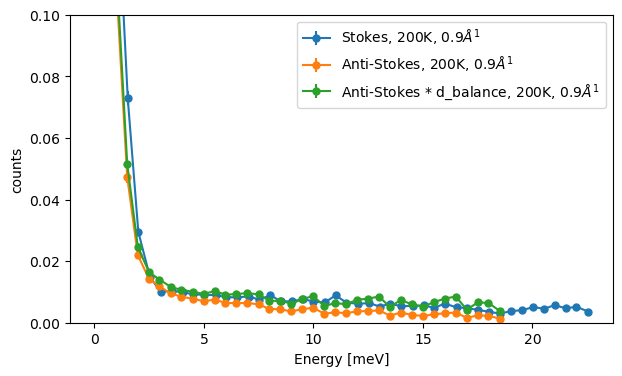

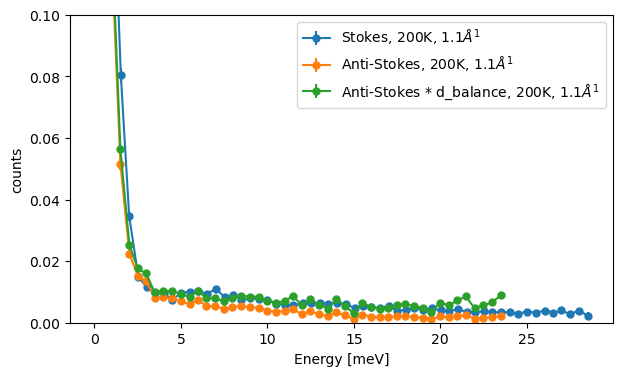

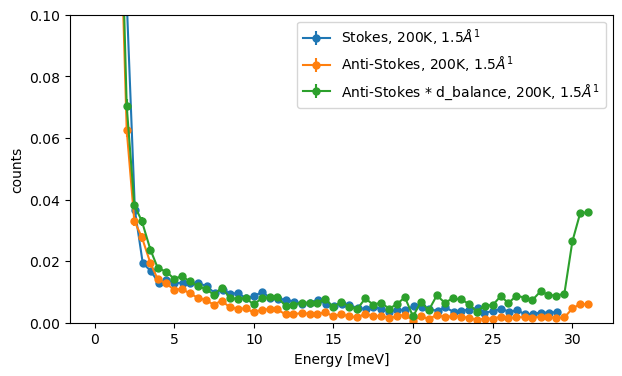

In [15]:
kB = 8.617333262e-2 # meV/K

for T in [300, 160, 200]:
    for q in [.7, .9, 1.1, 1.5]:
            try:
                plt.figure(figsize=(7,4))
                plt.xlabel('Energy [meV]')
                plt.ylabel('counts')
                plt.ylim(0, 0.1)
                S_gly = data.loc[Ngly[T,q]].data
                S_empty = data.loc[Nempty[q]].data
                CNTS = (S_gly.CNTS/S_gly.M1 - S_empty.CNTS/S_empty.M1)
                dCNTS = np.sqrt((S_gly.dCNTS/S_gly.M1)**2 + (S_empty.dCNTS/S_empty.M1)**2) 
                EN = S_gly.EN

                EN_stokes = EN[EN>0]
                CNTS_stokes = CNTS[EN>0]
                dCNTS_stokes = dCNTS[EN>0]

                EN_anti_stokes = -EN[EN<0]
                CNTS_anti_stokes = CNTS[EN<0]
                dCNTS_anti_stokes = dCNTS[EN<0]

                plt.errorbar(EN_stokes, CNTS_stokes, yerr=dCNTS_stokes, label='Stokes, {:}K, {:.1f}$\AA^1$'.format(T,q), ms = 5, fmt='o-')
                plt.errorbar(EN_anti_stokes, CNTS_anti_stokes, yerr=dCNTS_anti_stokes, label='Anti-Stokes, {:}K, {:.1f}$\AA^1$'.format(T,q), ms = 5, fmt='o-')
                plt.errorbar(EN_anti_stokes, CNTS_anti_stokes * np.exp(EN_anti_stokes/kB/T), yerr=dCNTS_anti_stokes, label='Anti-Stokes * d_balance, {:}K, {:.1f}$\AA^1$'.format(T,q), ms = 5, fmt='o-')
                plt.legend()
            except: pass

## Quasielastic (temp)

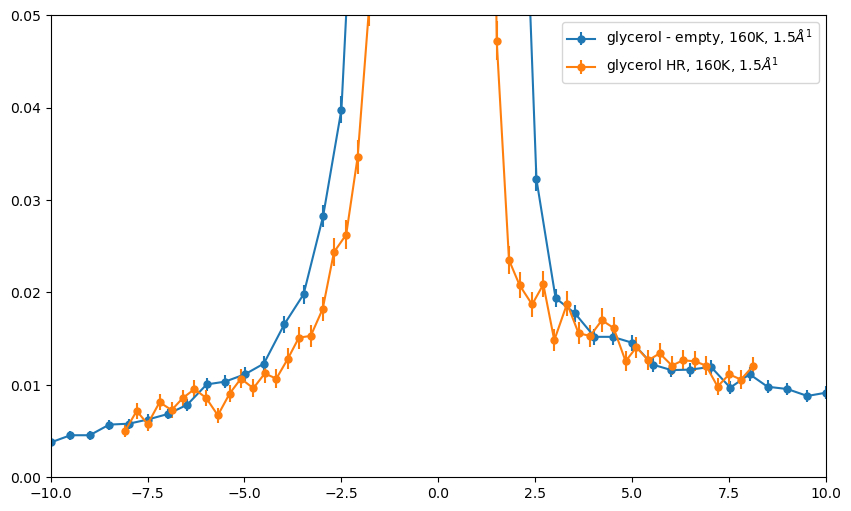

In [16]:
plt.figure(figsize=(10,6))

S_gly = data.loc[Ngly[160,1.5]].data
CNTS = (S_gly.CNTS/S_gly.M1)
dCNTS = np.sqrt((S_gly.dCNTS/S_gly.M1)**2) 
EN = S_gly.EN
plt.errorbar(EN, CNTS, yerr=dCNTS, label='glycerol - empty, 160K, {:.1f}$\AA^1$'.format(q), ms = 5, fmt='o-')

S_gly = data.loc[50343].data
CNTS = S_gly.CNTS/S_gly.M1*1.7
dCNTS = S_gly.dCNTS/S_gly.M1*1.7
EN = S_gly.EN
plt.errorbar(EN, CNTS, yerr=dCNTS, label='glycerol HR, 160K, {:.1f}$\AA^1$'.format(q), ms = 5, fmt='o-')

plt.ylim(0, 0.05)
plt.xlim(-10,10)
plt.legend()
